In [1]:
import sys
sys.path.insert(0, "/Users/nicoladilillo/Projects_mac/lettuce_spectral_signature")
from cars_model import CARS
import os

In [2]:
# extract the name of the file
col_group = ['Date', 'Class', 'Stress_weight', 'Position']
file_name = '10_SG_MSC/GA-iPLS_BOSS'
path = os.path.join(os.path.abspath(os.getcwd()), file_name)
c = CARS(path, MAX_COMPONENTS=10, col_group=col_group, calibration=False, cutoff=0.5)

Training samples: 158
	Class Healty: 83 samples
	Class Unhealty: 75 samples
Testing samples: 40
	Class Healty: 21 samples
	Class Unhealty: 19 samples


In [3]:
w = c.compute_survived_wavelengths_best_score_single()
c.plot_survived_df

Best accuracy for run 49 and iteration 989
Best accuracy = 0.85


,Wavelengths,count
0,400.000,0.0
1,401.000,0.0
2,402.000,0.0
3,403.000,0.0
4,404.000,0.0
...,...,...
541,2453.000,0.0
542,2454.000,0.0
543,2455.000,0.0
544,2456.000,0.0


['1091.000', '1420.000', '1461.000', '1643.000', '1884.000', '1886.000', '1970.000', '2094.000', '2367.000', '2449.000']

Total combinations to test: 1

Combination 0: ['1091.000', '1420.000', '1461.000', '1643.000', '1884.000', '1886.000', '1970.000', '2094.000', '2367.000', '2449.000']
Number of wavelengths: 10
Accuracy: 0.85, Recall: 0.84, Precision: 0.84, F1: 0.84 , nLV: 9, Cutoff: 0.50

False & 10 & 0.85 & 0.84 & 0.84 & 0.84  & 9.00  & 0.50 \\ \hline

Mismatched: [('20-Jun-2023', 'Healty', 40, 94), ('28-Jun-2023', 'Healty', 40, 114), ('20-Jun-2023', 'Healty', 40, 96), ('17-May-2023', 'Unhealty', 20, 46), ('17-May-2023', 'Unhealty', 20, 66), ('19-Jul-2023', 'Unhealty', 60, 155)]
Corresponding Stress_weight values:
 Index([20, 20, 60], dtype='int64', name='Stress_weight')


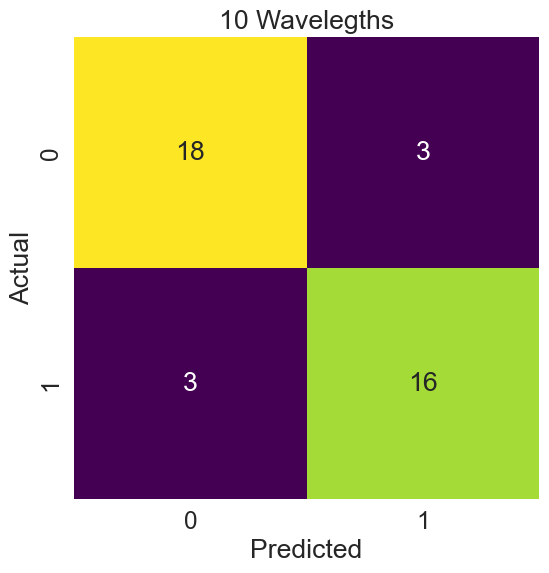

In [6]:
a, l, y_pred = c.accuracy_survived_wavelenghts(thr=None, rdm=False, all=False, model_type='PLS', wavelengths=[w], learning_curve=False, pls_plot=False, peak_detection=False, confusion_matrix_f=True)


import numpy as np
import pandas as pd

# Step 1 & 2: Find indices where predictions differ from true values
diff_indices = np.where(y_pred != c.y_test_2.flatten())[0]
# print(diff_indices)

# Step 3: Extract corresponding rows from c.df_test_2
diff_rows = c.df_test_2.iloc[diff_indices]

# Step 4: Filter rows where class is 'Uhealty'
stress_rows = diff_rows[diff_rows.index.get_level_values('Class') == 'Unhealty']

# Step : Extract 'Stress_weight' column
stress_weights = stress_rows.index.get_level_values('Stress_weight')

# If you want to print or return the results
print("Mismatched:", diff_rows.index.tolist())
print("Corresponding Stress_weight values:\n", stress_weights)

In [5]:
# for i in l:
#     print(len(i))
#     c.permutation_test(wavelengths=i)